<a href="https://colab.research.google.com/github/martinnv6/Data-Science-Master/blob/main/practica2/Practice2_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Practica 2.
- Martin Navarrete Villegas
- 1343696
- FCFM - UANL

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# This dataset was created using Visual Studio Code + Anaconda + Windows + github
# then the dataset .csv is loaded from same folder and not using google drive.

Mounted at /content/drive


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

### Exploratory Analysis

#### Read the file

Since we are going to work with sklearn discriminant analysis then we will use sklearn Iris dataset 

In [3]:
# import the iris dataset
iris_dataset = datasets.load_iris()
X = iris_dataset.data 
y = iris_dataset.target
target_names = iris_dataset.target_names

In [4]:
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_df['Species']=iris_dataset['target']
iris_df['Species']=iris_df['Species'].apply(lambda x: iris_dataset['target_names'][x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


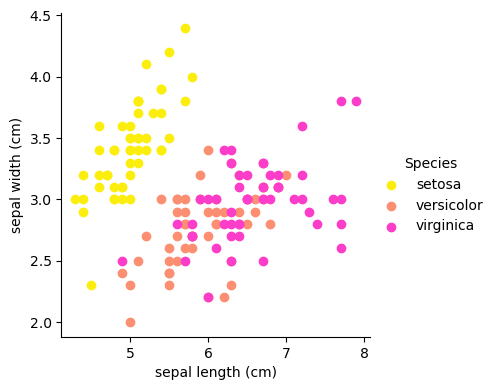

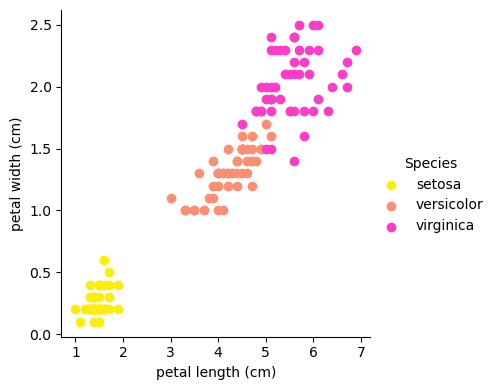

In [5]:
colors = {'Setosa':'#FCEE0C','Versicolor':'#FC8E72','Virginica':'#FC3DC9'}

#Let see how the classes are separated regarding different featueres

sns.FacetGrid(iris_df, hue="Species", height=4, palette=colors.values()) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()


sns.FacetGrid(iris_df, hue= "Species", height=4, palette=colors.values()).\
map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()
plt.show()

#### PCA with 2 componets
Let's apply PCA with 2 componets, so we can represent data in two dimensions.

In [8]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

explained variance ratio (first two components): [0.72962445 0.22850762]


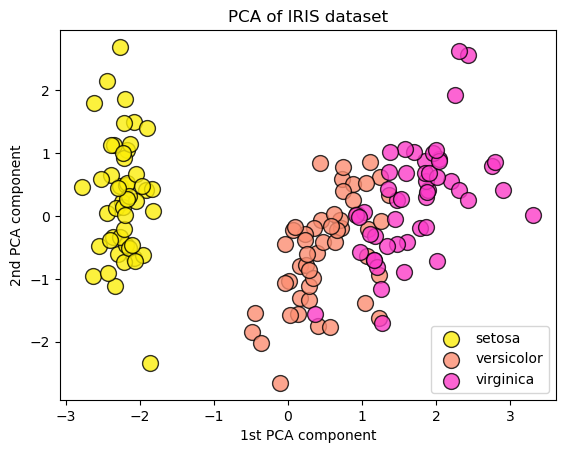

In [9]:
pca2 = PCA(n_components=2)
X_r = pca2.fit_transform(X)

for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, 
                label=target_name, s=130, edgecolors='k')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.title('PCA of IRIS dataset')

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' # First two PCA components capture 0.9776852*100% of total variation!
      % str(pca2.explained_variance_ratio_))

plt.show()

explained variance ratio (first three components): [0.92461872 0.05306648 0.01710261]


C:\Users\martin_navarrete\AppData\Local\Temp\ipykernel_29372\1181842660.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


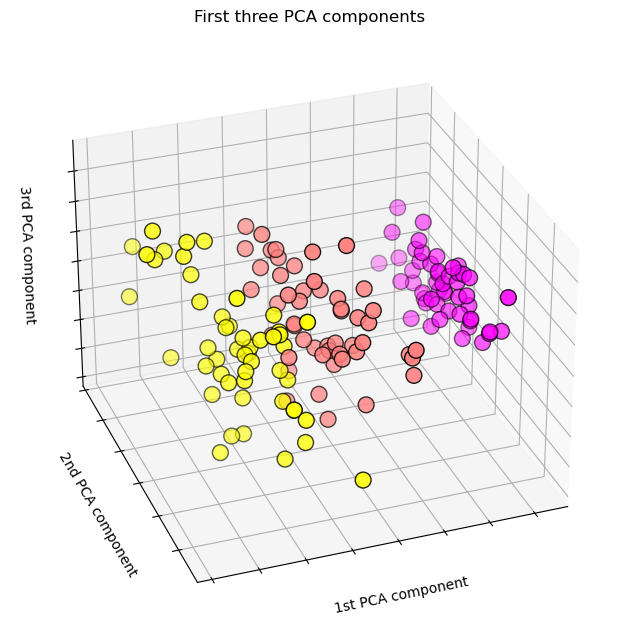

In [10]:
# Now in 3 dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
pca3 = PCA(n_components=3)

X_reduced = pca3.fit_transform(iris_dataset.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.spring, edgecolor='k', s=130)
ax.set_title("First three PCA components")
ax.set_xlabel("1st PCA component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PCA component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PCA component")
ax.w_zaxis.set_ticklabels([])

# Percentage of variance explained for each component
print('explained variance ratio (first three components): {}' # First three PCA components capture 0.99478781 of total variation!
      .format(pca3.explained_variance_ratio_))

plt.show()

#### LDA with two components

Explained variance ratio (first two linear discriminants): [0.9912126 0.0087874]


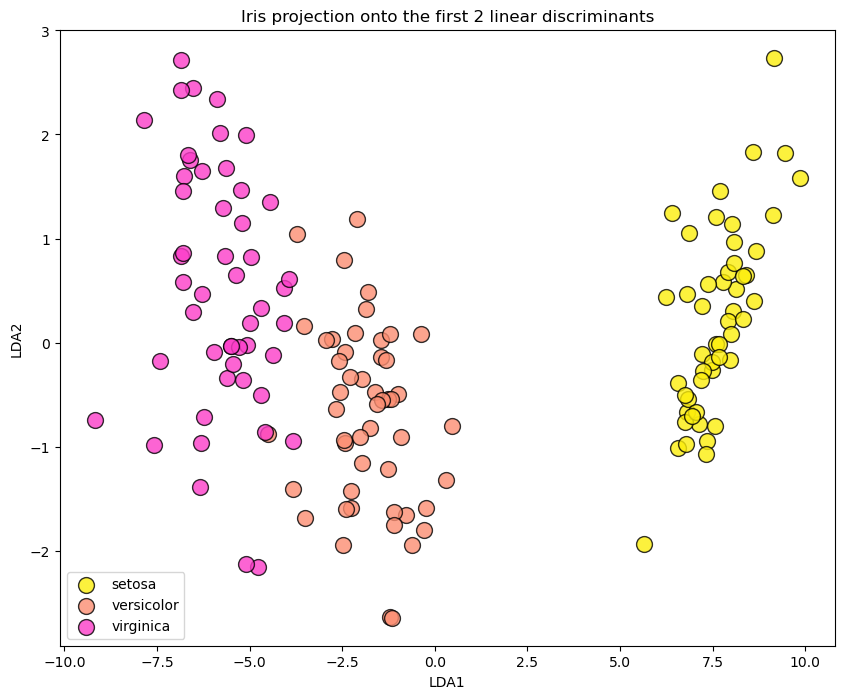

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_r2 = lda.transform(X)
plt.figure(figsize=(10,8))
for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name,  s=130, edgecolors='k')
plt.legend(loc=3, shadow=False, scatterpoints=1)
plt.xlabel('LDA1')
plt.ylabel('LDA2')           

plt.title('Iris projection onto the first 2 linear discriminants')

print('Explained variance ratio (first two linear discriminants): {}'.format(lda.explained_variance_ratio_))
plt.show()

### t-SNE
We will visualize our dataset using t-SNE. We set the dimension of the embedded space to two.

c:\Users\martin_navarrete\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\martin_navarrete\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


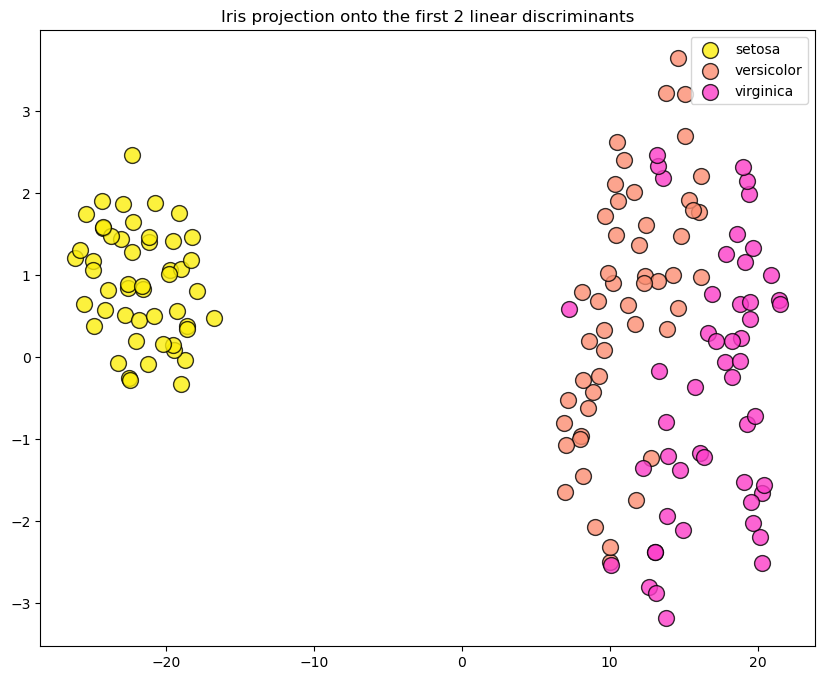

In [12]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

figure = plt.figure
figure(figsize=(10, 8))

for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=.8, color=color,
                label=target_name,  s=130, edgecolors='k')
plt.legend(loc='best', shadow=False, scatterpoints=1)
           
plt.title('Iris projection onto the first 2 linear discriminants')
plt.show()

Summary
In my presentation, I discussed the basic methods of dimensionality reduction using scikit-learn, which enabled us to decrease the number of dimensions in our initial data and generate visual representations of our findings. By doing so, we were able to reveal some previously unknown correlations between different features.